In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
import pandas as pd

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/car_price_prediction.csv (1).zip')

In [6]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [8]:
import warnings
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
df.shape

df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,19237.00,19237.00,19237.00,19237.00,19237.00
mean,45576535.89,18555.93,2010.91,4.58,6.58
std,936591.42,190581.27,5.67,1.20,4.32
min,20746880.00,1.00,1939.00,1.00,0.00
25%,45698374.00,5331.00,2009.00,4.00,4.00
50%,45772308.00,13172.00,2012.00,4.00,6.00
75%,45802036.00,22075.00,2015.00,4.00,12.00
max,45816654.00,26307500.00,2020.00,16.00,16.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


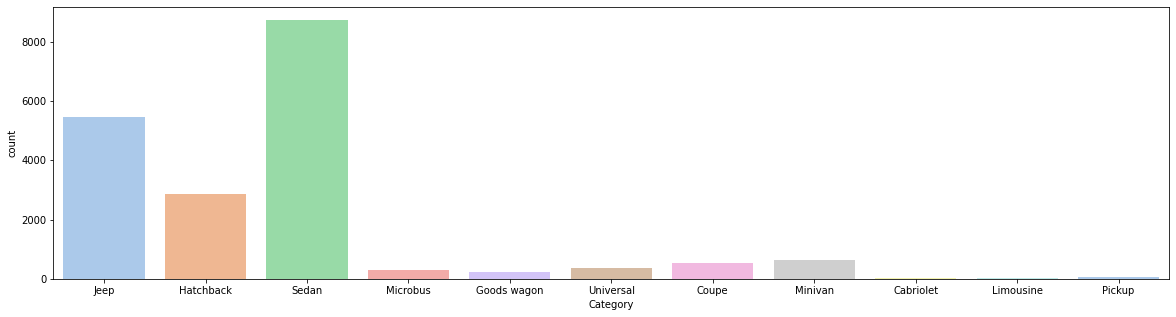

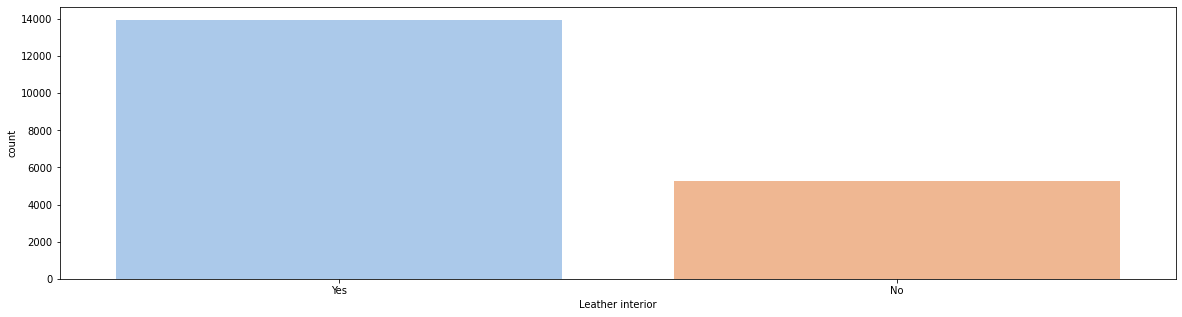

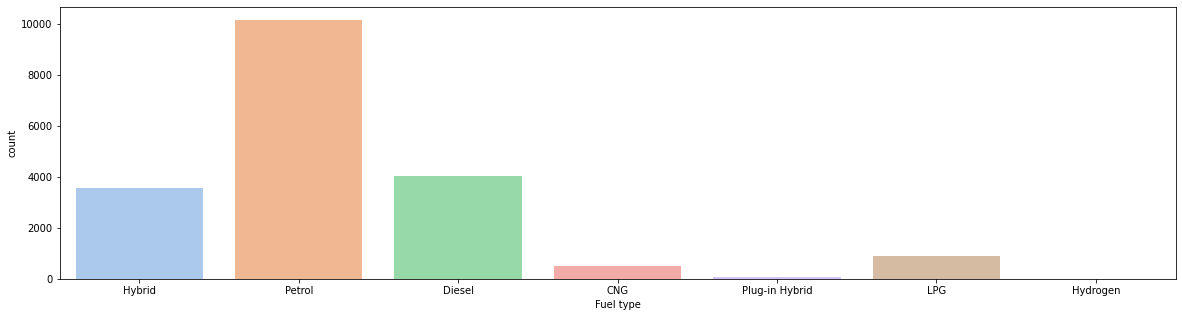

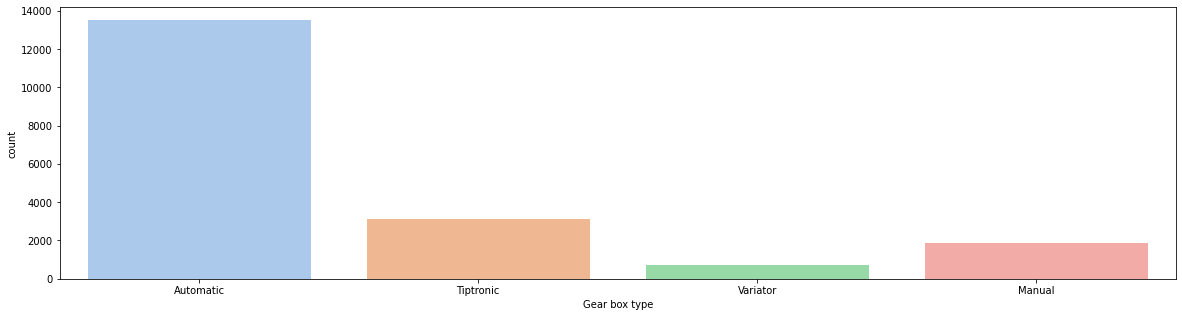

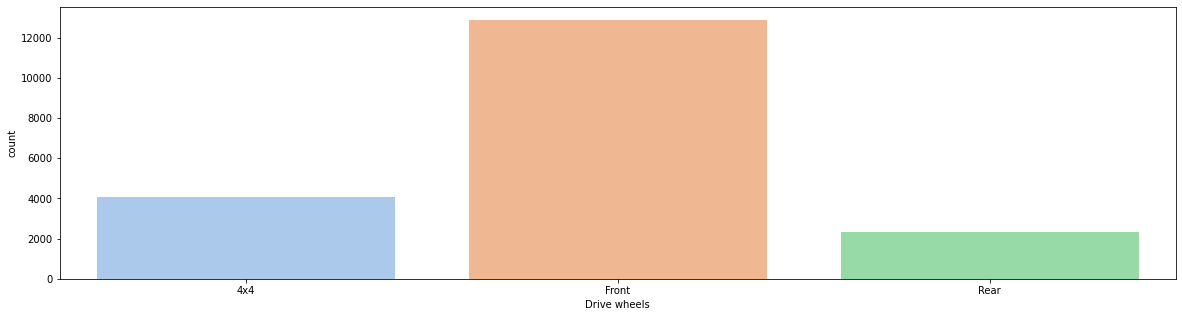

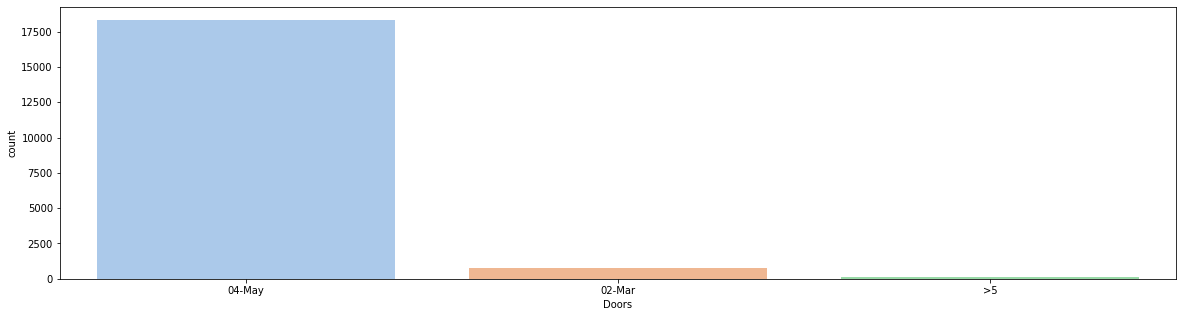

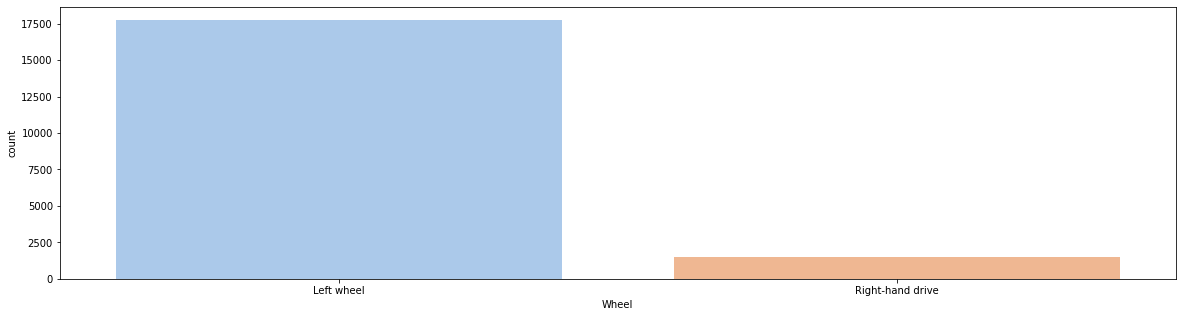

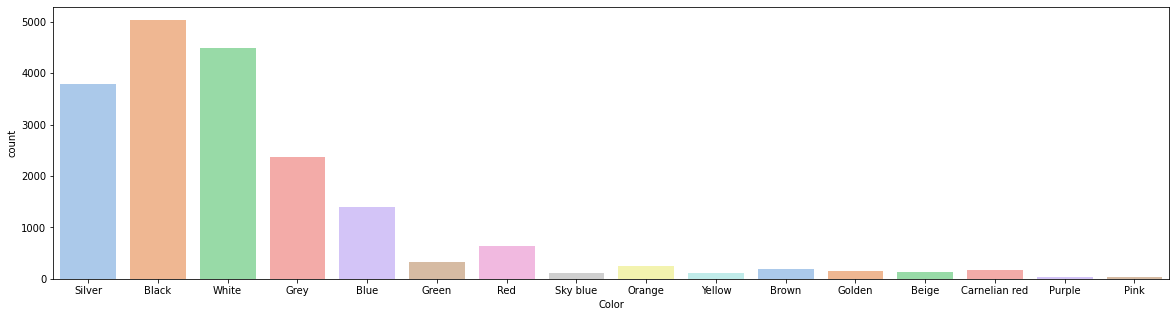

In [11]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

cat_feature1=[feature for feature in cat_feature if len(df[feature].unique())<50]
for feature in cat_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="pastel")
    plt.show()

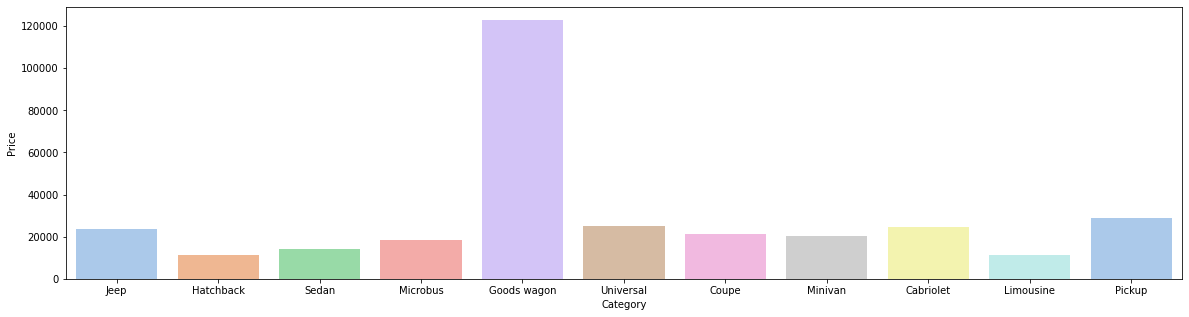

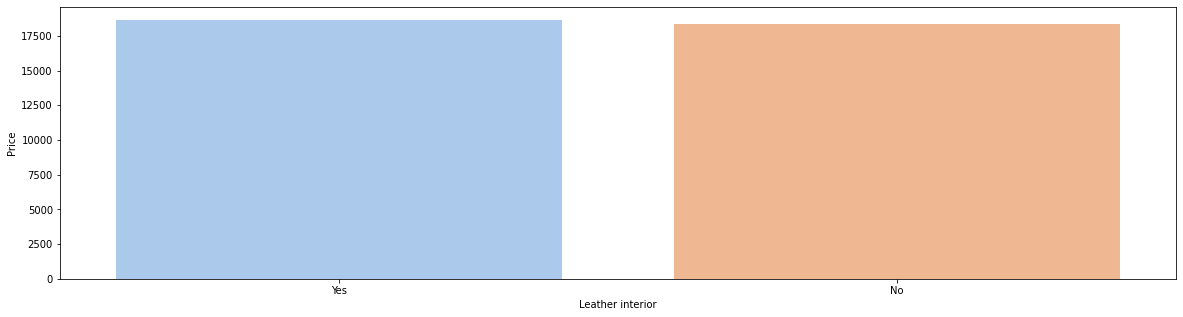

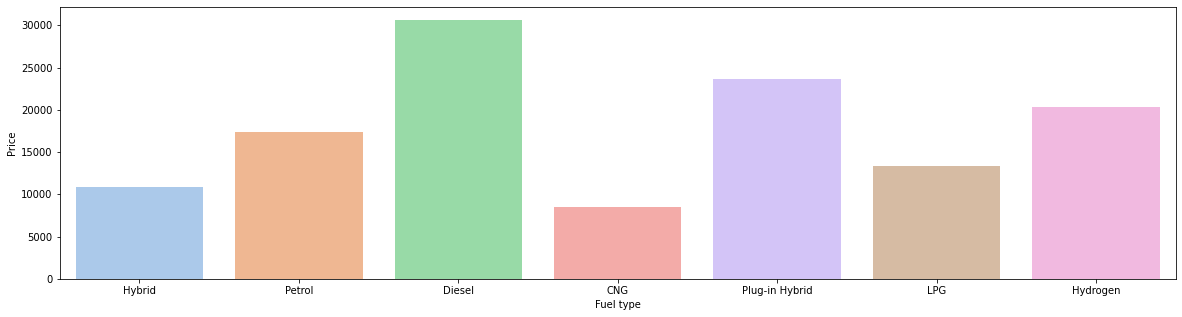

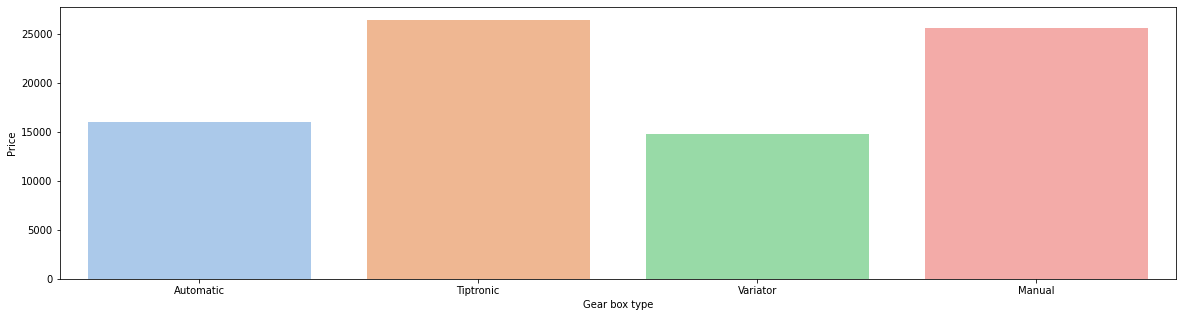

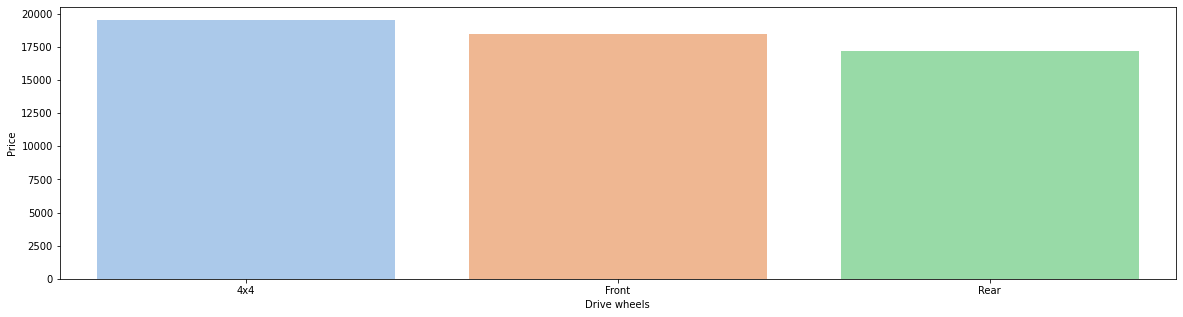

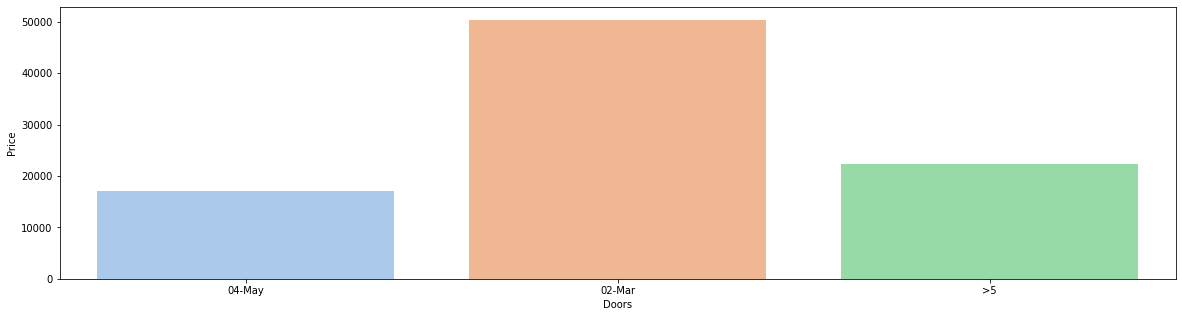

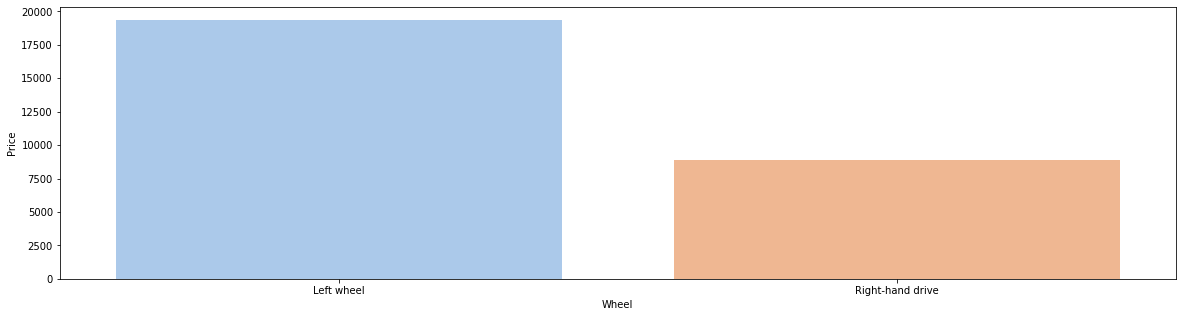

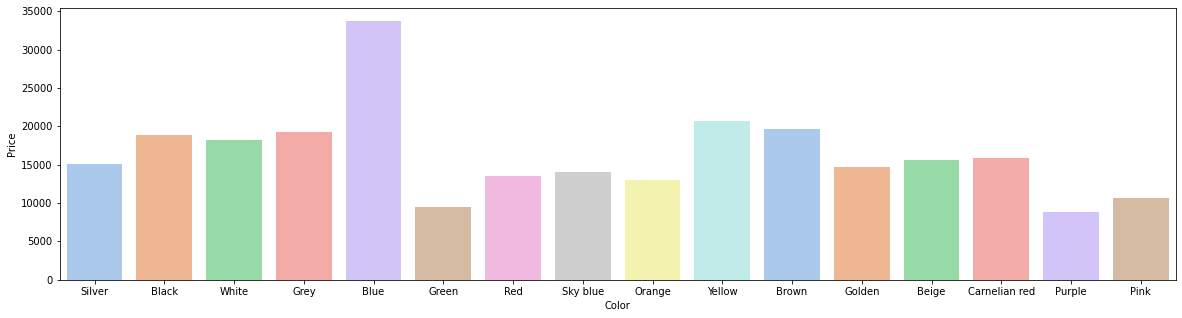

In [12]:
for feature in cat_feature1:
    plt.figure(figsize = (20, 5))
    sns.barplot(x=df[feature],y=df['Price'],ci=None,palette='pastel')
    plt.show()

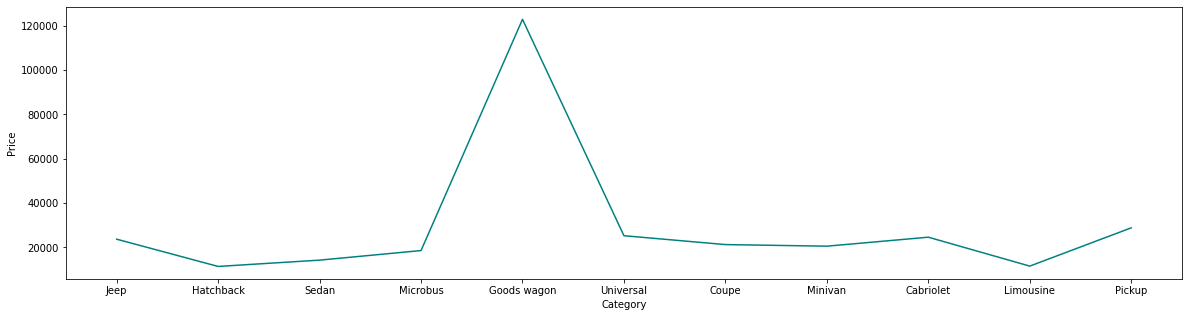

In [13]:
plt.figure(figsize = (20, 5))
sns.lineplot(x=df['Category'],y=df['Price'],ci=None,palette='pastel',color='Teal')
plt.show()

In [14]:
## feature engineering

In [15]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [17]:
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])
df.drop_duplicates(inplace=True)
print("No. of rows after dropping duplicates: ", df.shape[0])

No. of duplicate rows:  313
No. of rows after dropping duplicates:  18924


In [18]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']


In [19]:
len(df['ID'].value_counts())
df.drop('ID',axis=1,inplace=True)

In [20]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4


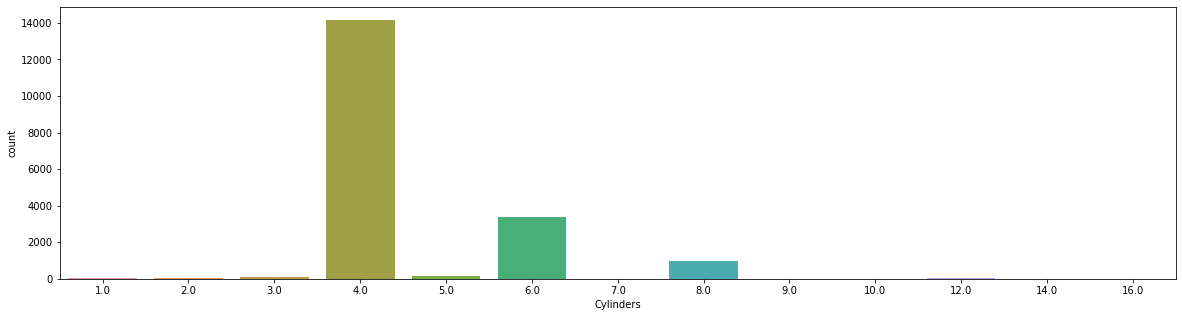

In [23]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Cylinders',data=df)
plt.show()

In [24]:
for feature in cat_feature:
    print(f'{feature} has {len(df[feature].unique())} values')

Levy has 559 values
Manufacturer has 65 values
Model has 1590 values
Category has 11 values
Leather interior has 2 values
Fuel type has 7 values
Engine volume has 107 values
Mileage has 7687 values
Gear box type has 4 values
Drive wheels has 3 values
Doors has 3 values
Wheel has 2 values
Color has 16 values


In [25]:
df['Mileage']=df['Mileage'].str.split().str[0]
df['Mileage']=df['Mileage'].astype(int)
df['Turbo']=np.where(df['Engine volume'].str.split().str[1]=='Turbo',1,0)
df['Turbo'].unique()

df['Engine volume']=df['Engine volume'].str.split().str[0]
map_feature=[feature for feature in cat_feature if len(df[feature].unique())>10 and df[feature].dtype=='O']
print(map_feature)

['Levy', 'Manufacturer', 'Model', 'Category', 'Engine volume', 'Color']


In [26]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for feature in ['Manufacturer', 'Model', 'Category', 'Color','Fuel type','Gear box type','Wheel','Drive wheels']:
    df[feature]=encode.fit_transform(df[feature])
df['Leather interior'].unique()
df['Leather interior']=df['Leather interior'].map({"Yes":1,'No':0})
df['Doors']=df['Doors'].str.split('-').str[0]
df['Doors'].unique()
df['Doors']=df['Doors'].replace('>5',5)
df['Doors']=df['Doors'].astype(int)
df.head()


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,32,1242,2010,4,1,2,3.5,186005,6.00,0,0,4,0,12,12,0
1,16621,1018,8,658,2011,4,0,5,3,192000,6.00,2,0,4,0,1,8,0
2,8467,-,21,684,2006,3,0,5,1.3,200000,4.00,3,1,4,1,1,2,0
3,3607,862,16,661,2011,4,1,2,2.5,168966,4.00,0,0,4,0,14,0,0
4,11726,446,21,684,2014,3,1,5,1.3,91901,4.00,0,1,4,0,12,4,0


In [28]:
df['Engine volume']=df['Engine volume'].astype(float)
df["Levy"]=df["Levy"].replace('-',0)
df["Levy"]=df["Levy"].astype(int)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,32,1242,2010,4,1,2,3.50,186005,6.00,0,0,4,0,12,12,0
1,16621,1018,8,658,2011,4,0,5,3.00,192000,6.00,2,0,4,0,1,8,0
2,8467,0,21,684,2006,3,0,5,1.30,200000,4.00,3,1,4,1,1,2,0
3,3607,862,16,661,2011,4,1,2,2.50,168966,4.00,0,0,4,0,14,0,0
4,11726,446,21,684,2014,3,1,5,1.30,91901,4.00,0,1,4,0,12,4,0


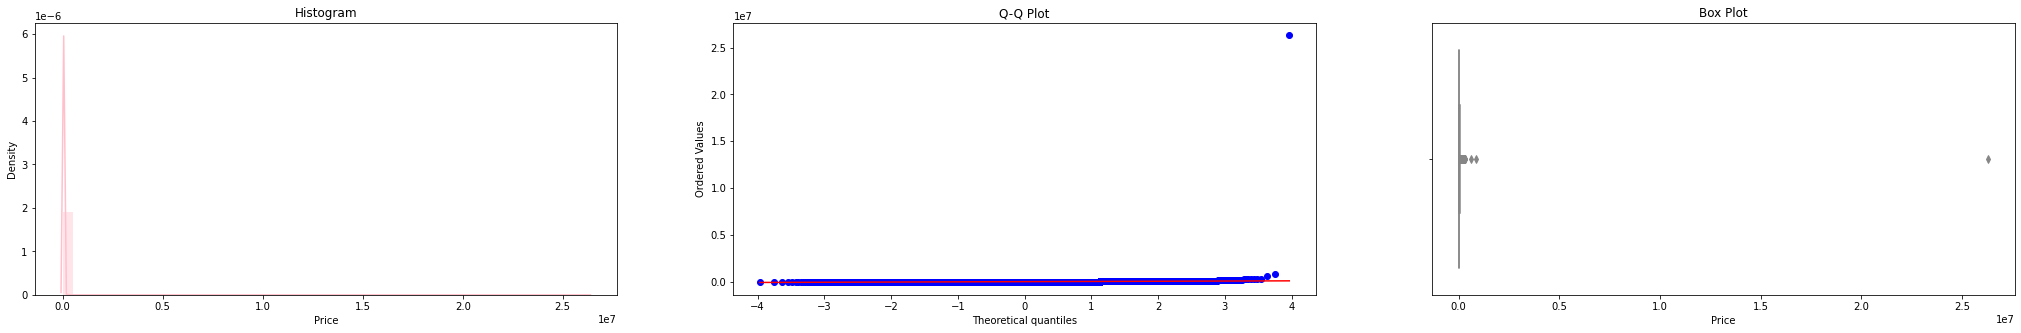

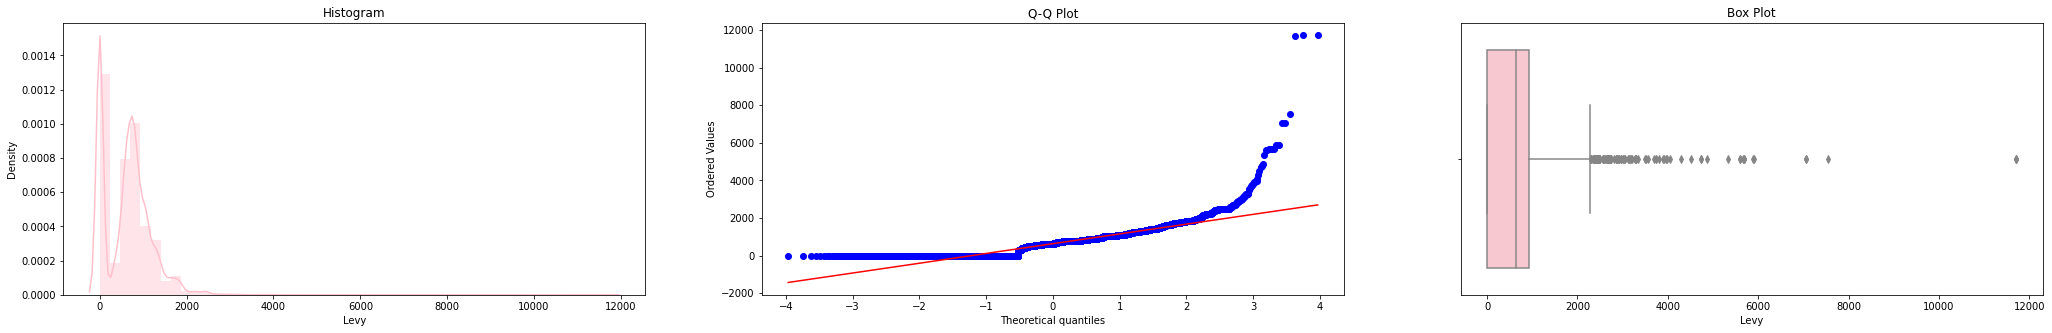

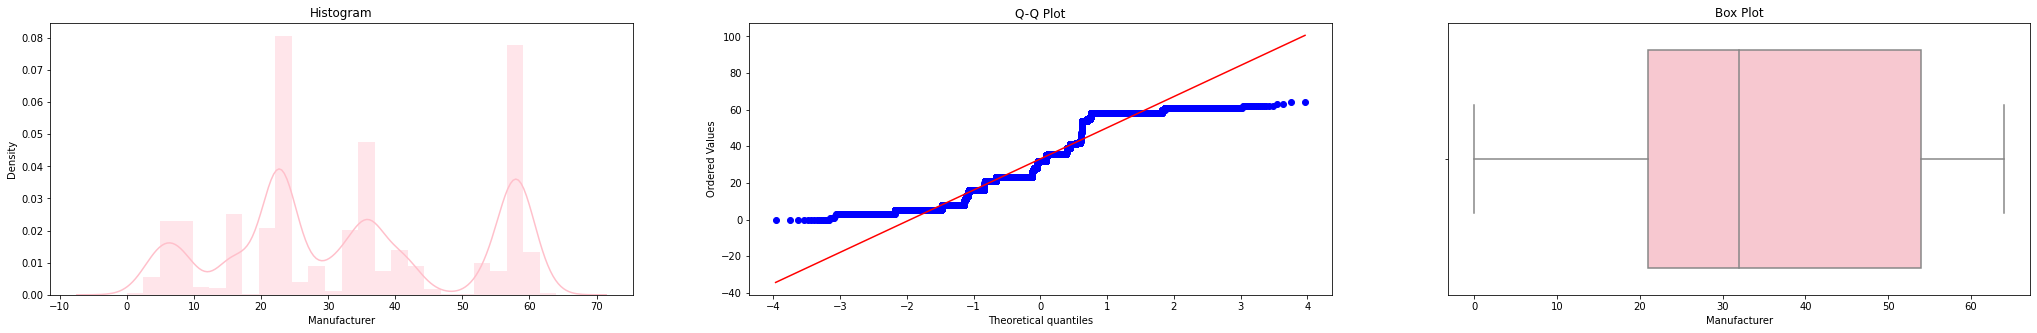

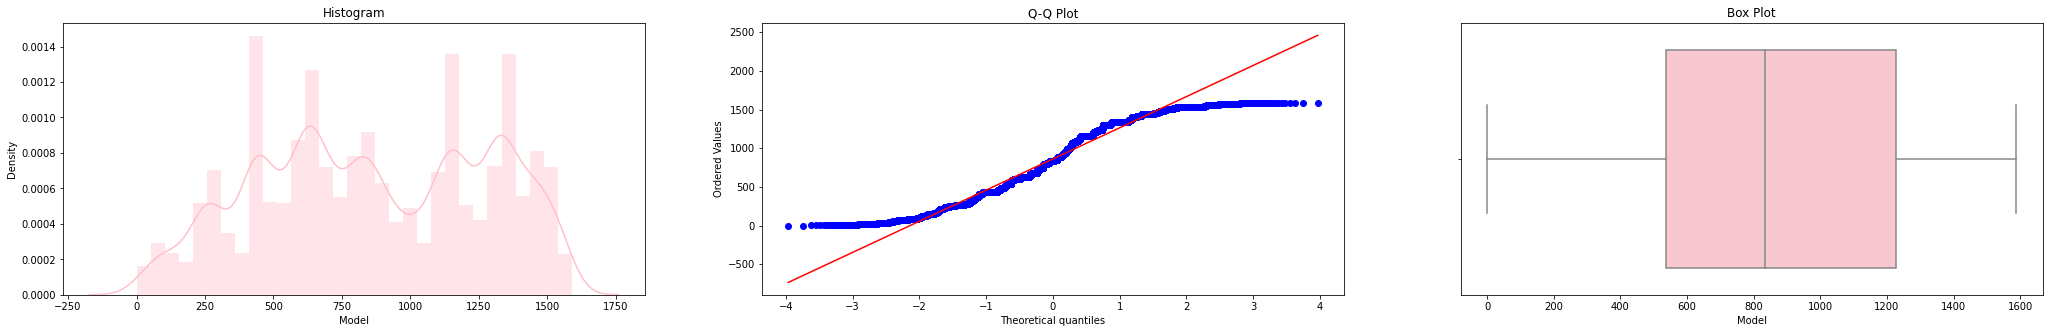

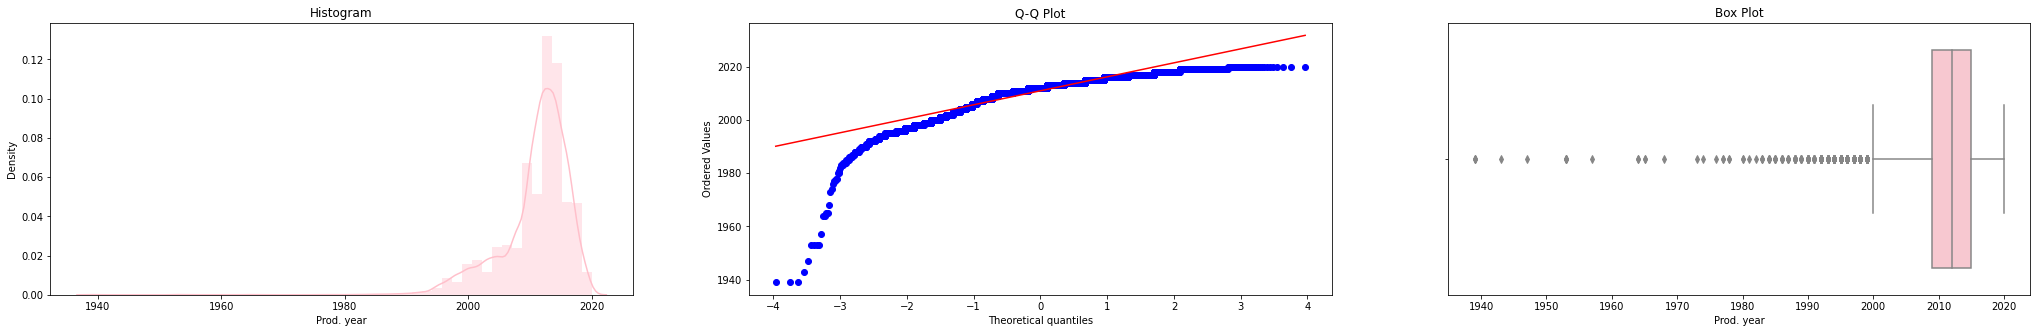

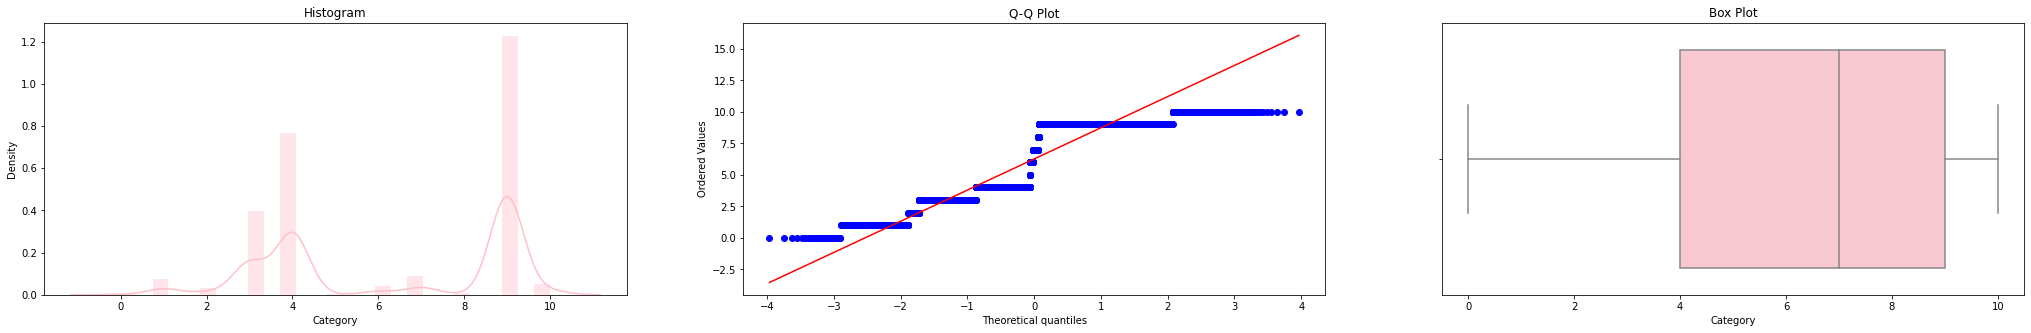

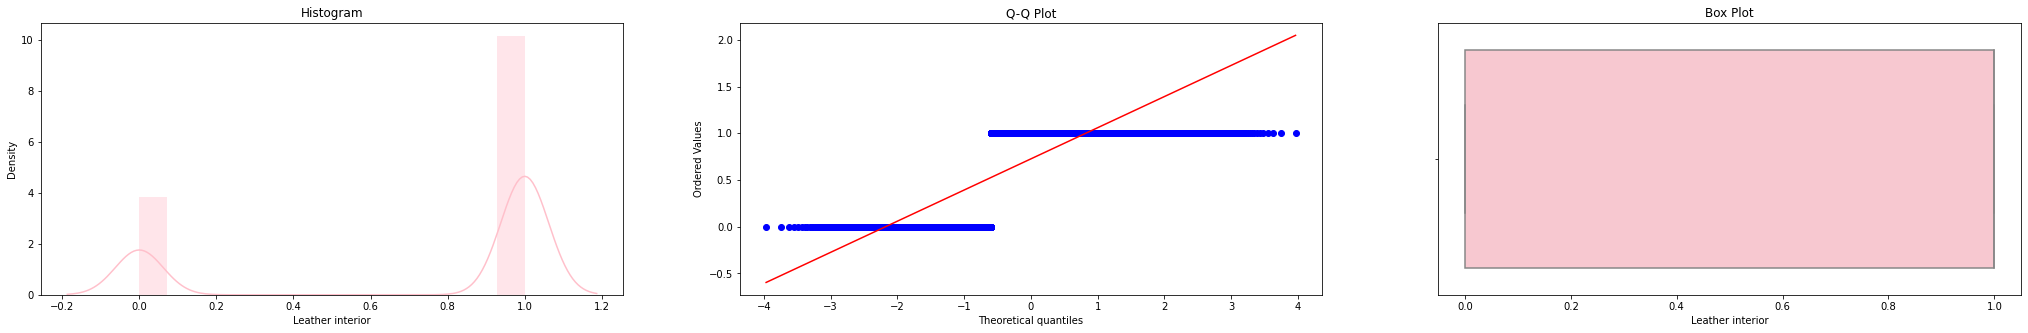

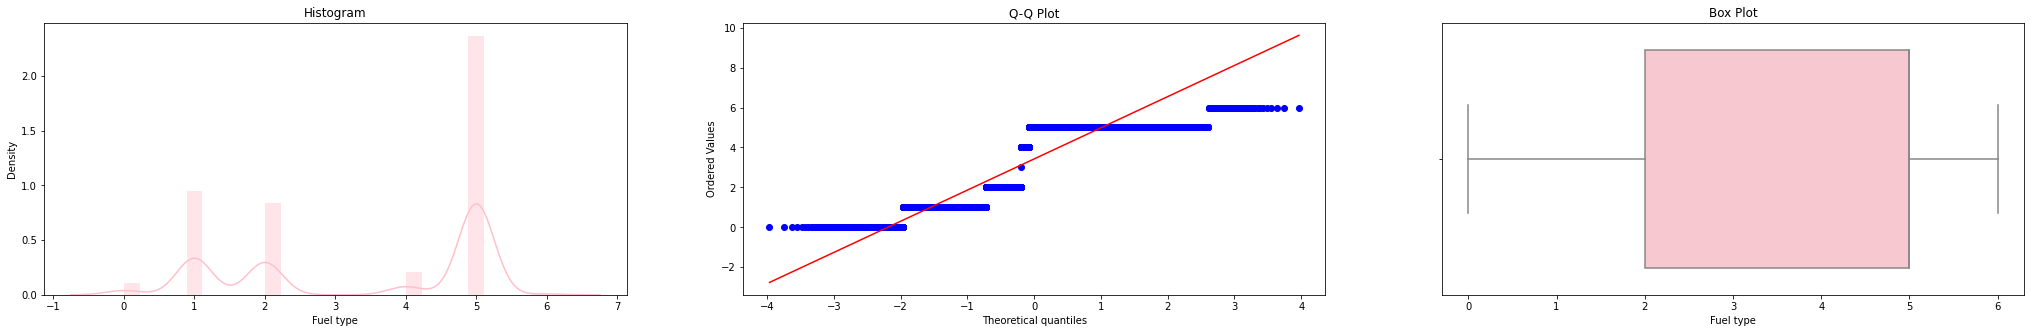

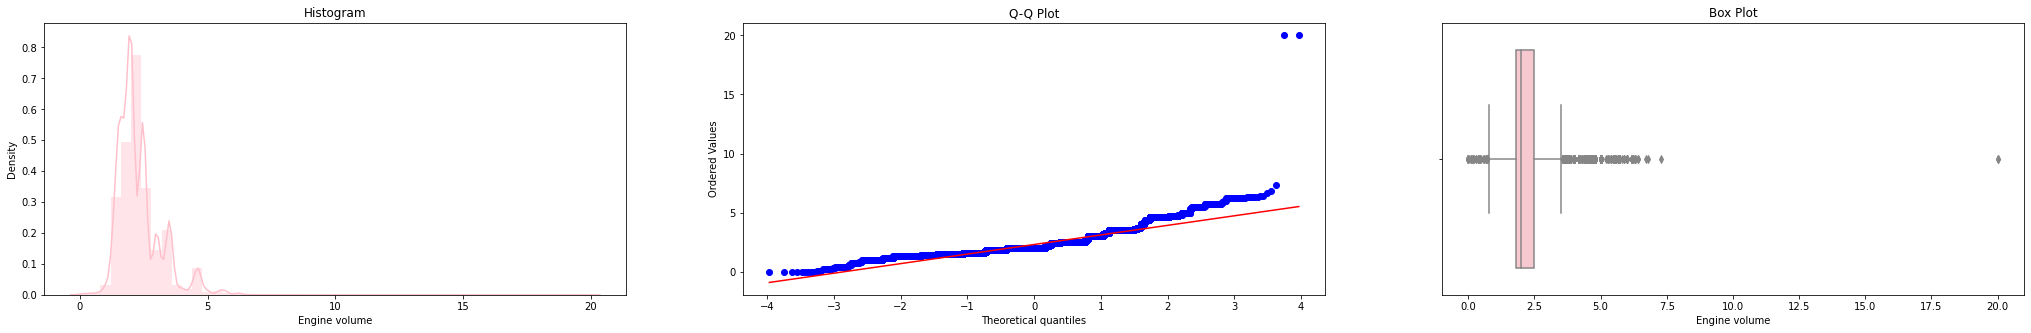

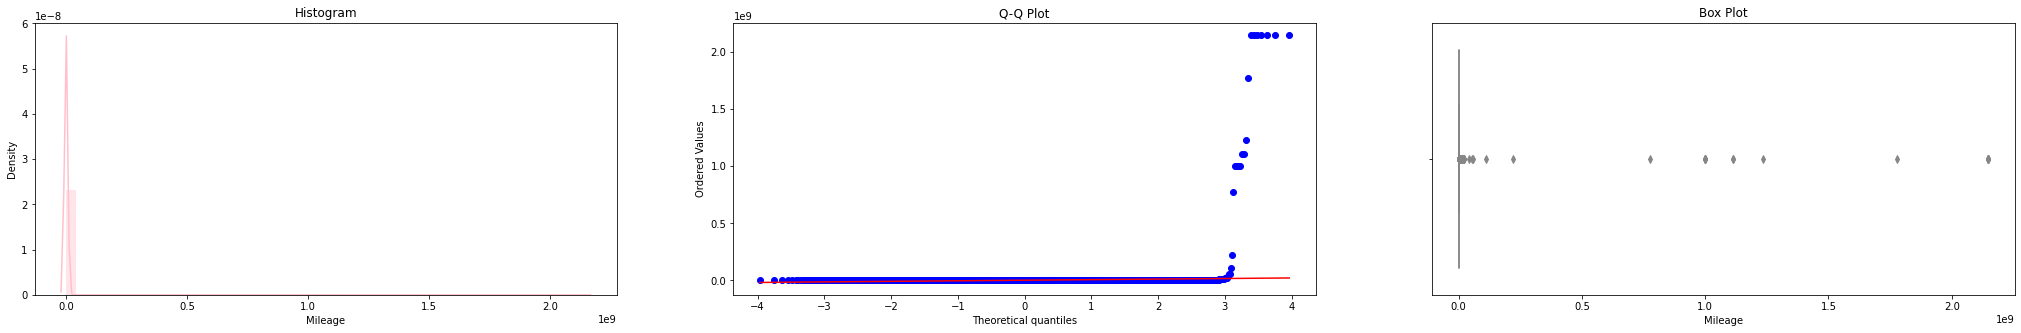

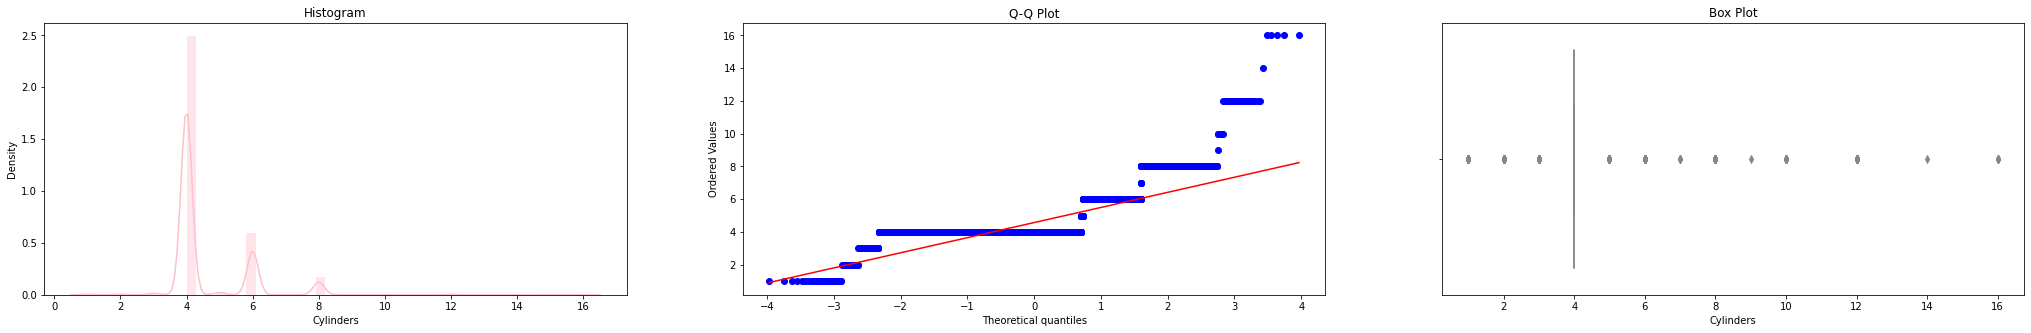

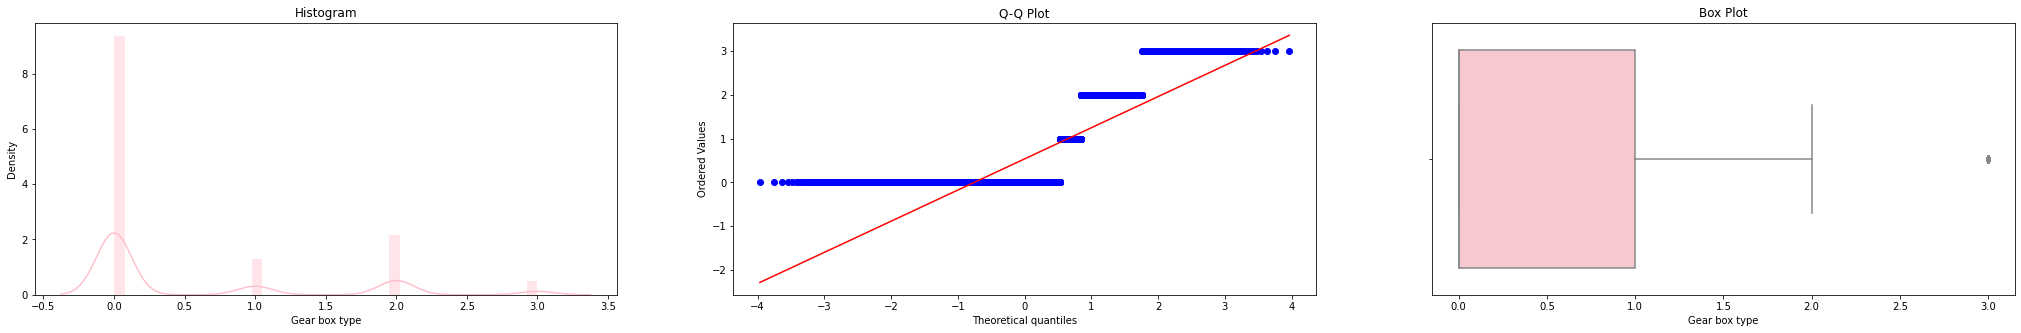

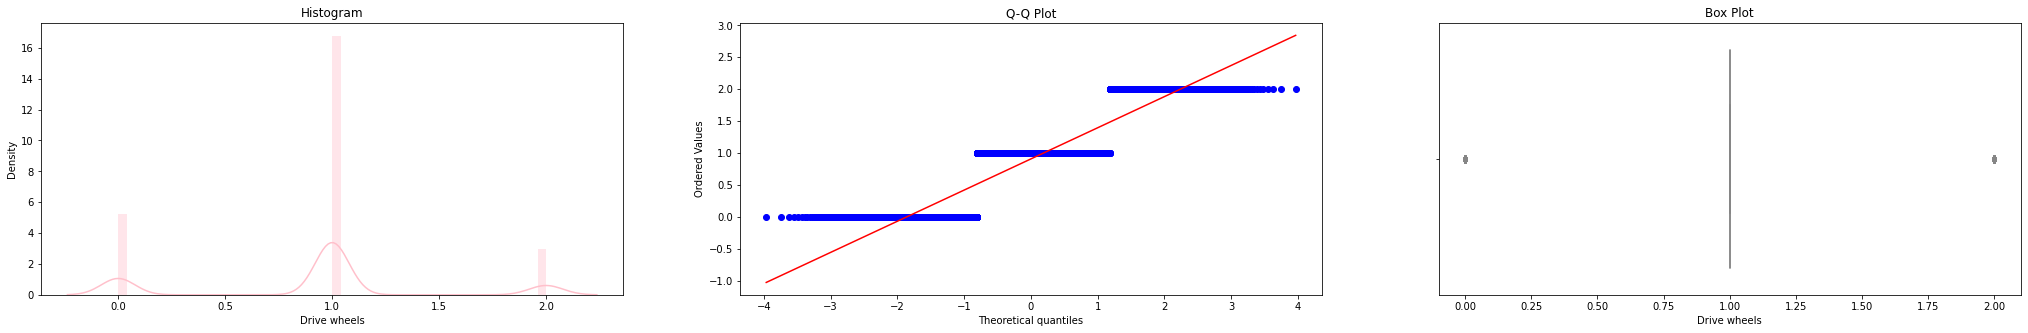

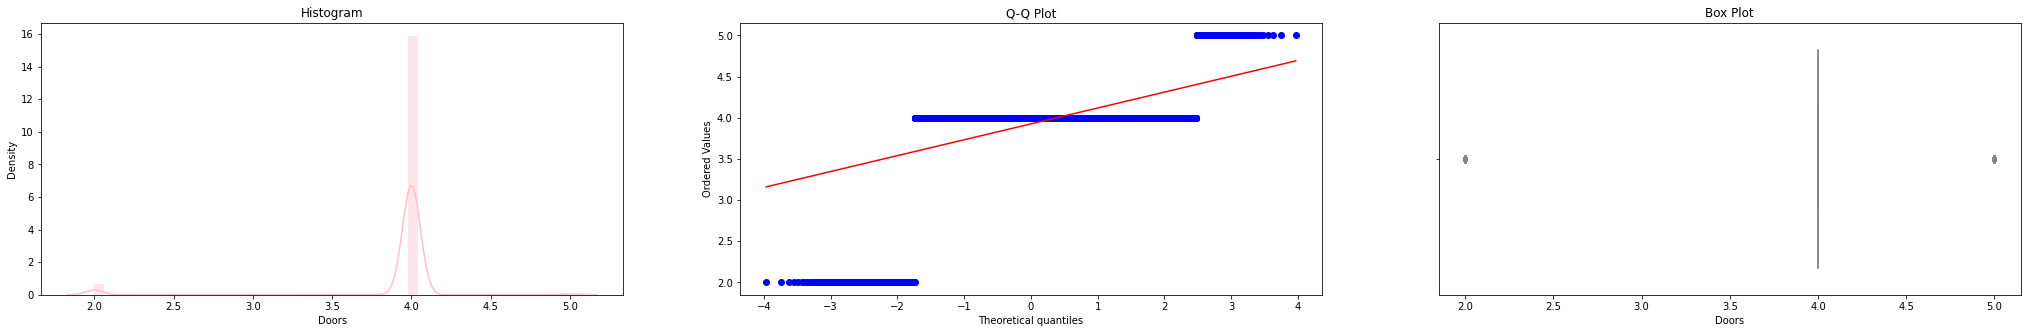

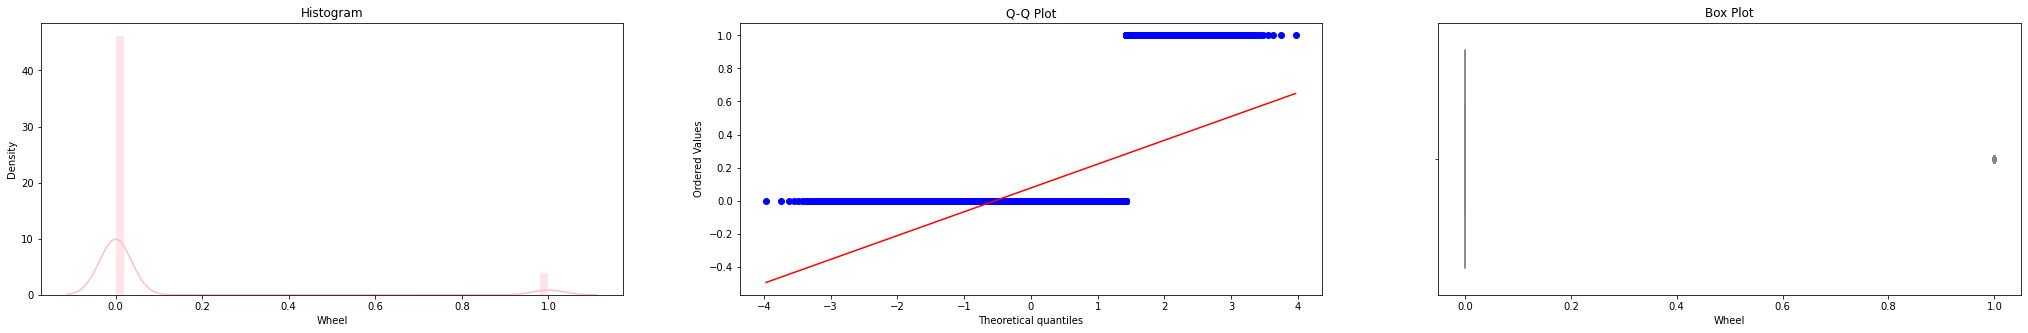

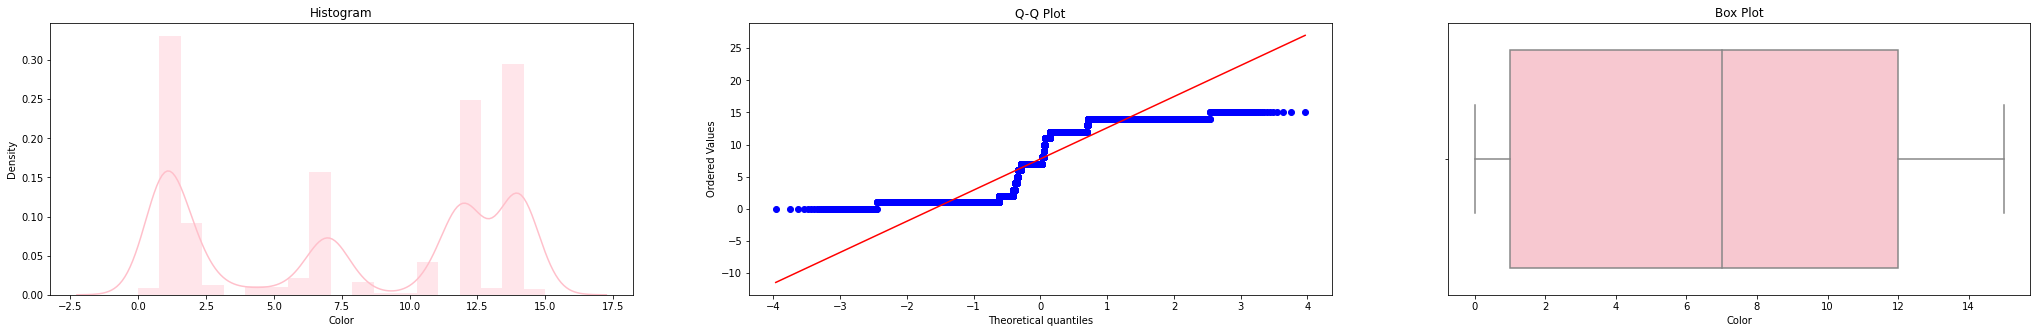

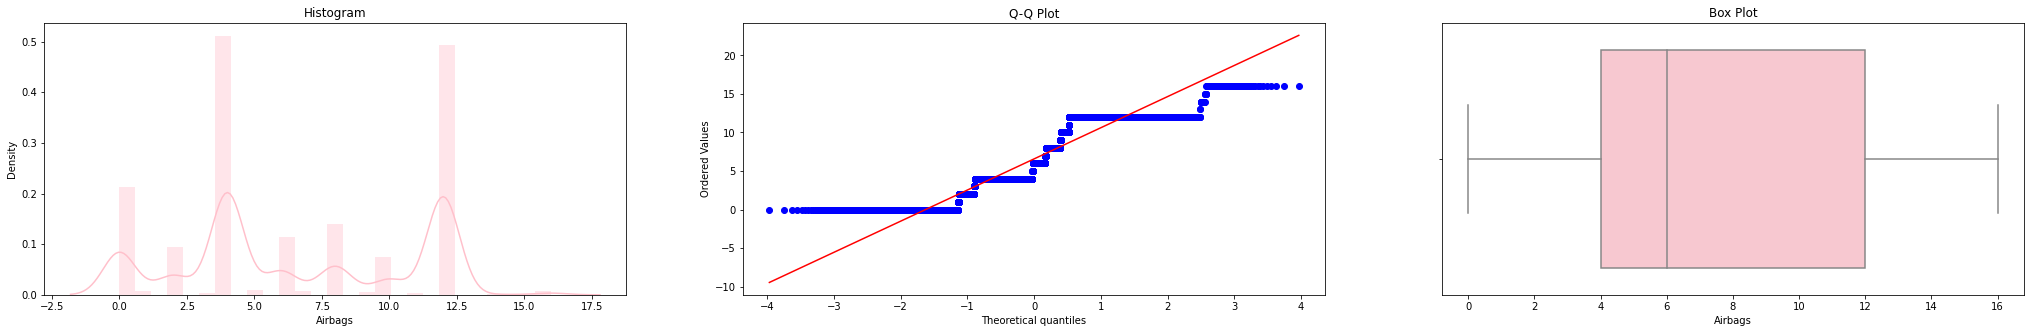

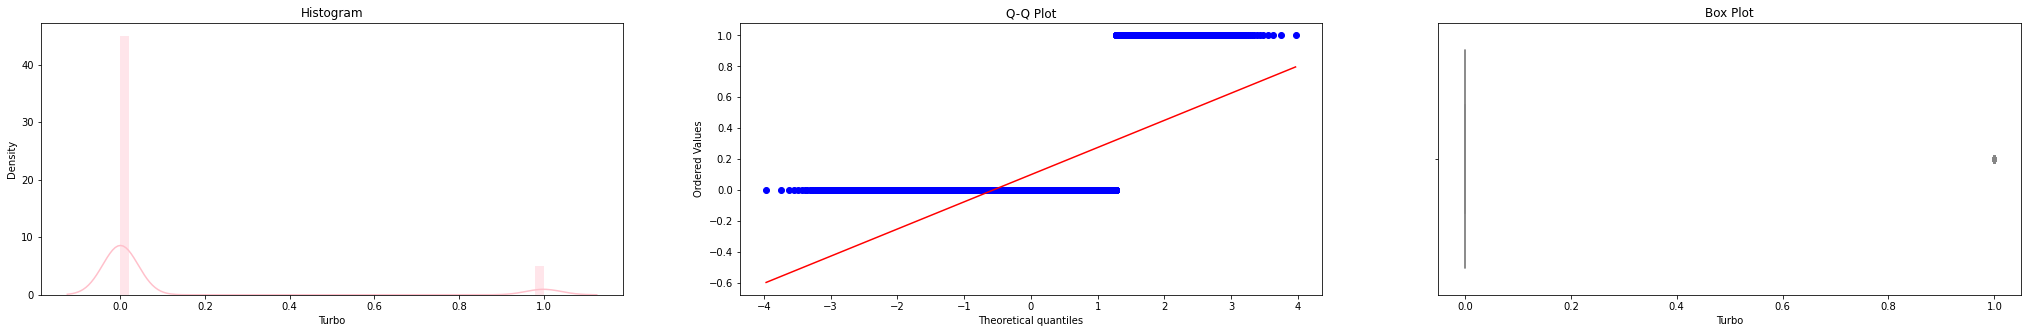

In [29]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='pink')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='pink')
    plt.title('Box Plot')
    
    plt.show()
for col in df.columns:
   diagnostic_plot(df, col)


In [31]:
outlier=[feature for feature in df.columns if len(df[feature].unique())>100]
print(outlier)

features=[feature for feature in df.columns]
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

['Price', 'Levy', 'Model', 'Mileage']
Price      16732.00
Levy         917.00
Model        689.00
Mileage   118924.00
dtype: float64


In [32]:
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  17090


In [33]:
x=df.iloc[:,1:]
x

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,1399,32,1242,2010,4,1,2,3.50,186005,6.00,0,0,4,0,12,12,0
1,1018,8,658,2011,4,0,5,3.00,192000,6.00,2,0,4,0,1,8,0
2,0,21,684,2006,3,0,5,1.30,200000,4.00,3,1,4,1,1,2,0
3,862,16,661,2011,4,1,2,2.50,168966,4.00,0,0,4,0,14,0,0
4,446,21,684,2014,3,1,5,1.30,91901,4.00,0,1,4,0,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0,36,385,1999,1,1,0,2.00,300000,4.00,1,2,2,0,12,5,1
19233,831,23,1334,2011,9,1,5,2.40,161600,4.00,2,1,4,0,11,8,0
19234,836,23,1442,2010,4,1,1,2.00,116365,4.00,0,1,4,0,7,4,0
19235,1288,8,456,2007,4,1,1,2.00,51258,4.00,0,1,4,0,1,4,0


In [35]:
y=df.iloc[:,[0]]
y

,Price
0,13328
1,16621
2,8467
3,3607
4,11726
...,...
19232,8467
19233,15681
19234,26108
19235,5331


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (12817, 17)
X_test: (4273, 17)
Y_train: (12817, 1)
Y_test: (4273, 1)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameter={'alpha':[1,0.5,0.1,0.01,5,10,50,100]}
ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.5, 0.1, 0.01, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error')

{'alpha': 10}


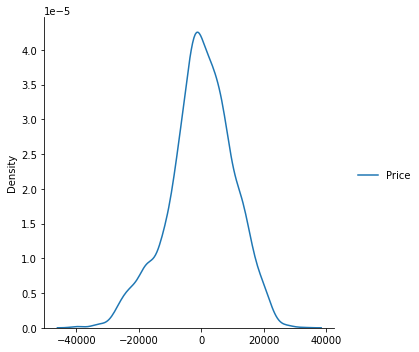

In [39]:
print(ridgecv.best_params_)

ridge_pred=ridgecv.predict(x_test)
sns.displot(ridge_pred-y_test,kind='kde')

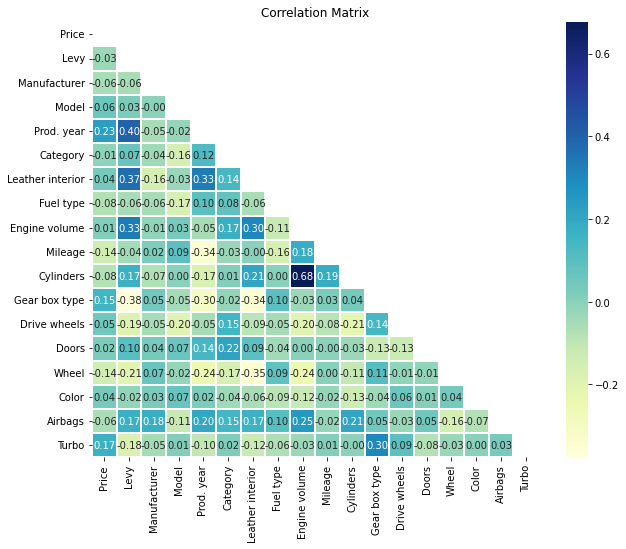

In [40]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)
score

plt.figure(figsize = (10, 8))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [41]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [42]:
print(lassocv.best_params_)
lasso_pred=lassocv.predict(x_test)
score=r2_score(lasso_pred,y_test)
score

{'alpha': 1}


-2.57734667410035

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
parameter={"n_neighbors":[1,2,3,4,5,10,20,50]}
from sklearn.model_selection import GridSearchCV
knncv=GridSearchCV(knn,parameter,scoring='neg_mean_squared_error',cv=5)
knncv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 50]},
             scoring='neg_mean_squared_error')

{'n_neighbors': 5}


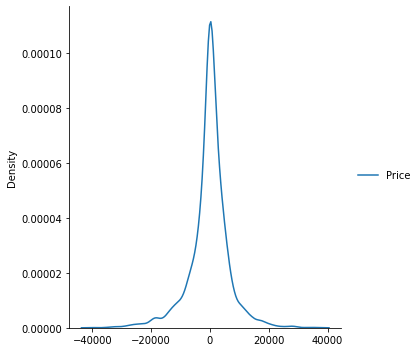

In [44]:
print(knncv.best_params_)

knn_pred=knncv.predict(x_test)
sns.displot(knn_pred-y_test,kind='kde')

In [45]:
score=r2_score(knn_pred,y_test)
score

from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier()
## preprunning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[100,200,300,500]
}


In [46]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 200, 300, 500]},
             scoring='accuracy')

In [47]:
cv.best_params_
y_pred=cv.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.23496372571963492


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
print("Training score:",GB.score(x_train,y_train))
print("Testing score:",GB.score(x_test,y_test))

Training score: 0.6245996898501871
Testing score: 0.6189980969875444


In [50]:
from sklearn.pipeline import Pipeline


In [65]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
test_score=[]
train_score=[]
modell=[]

from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('lr', LinearRegression())])
pipeline_svc = Pipeline([('svc', SVR())])
pipeline_dt = Pipeline([('dt', DecisionTreeRegressor())])
pipeline_knn = Pipeline([('knn', KNeighborsRegressor())])
pipelines_rf = Pipeline([('rf', RandomForestRegressor())])
pipelines_ab = Pipeline([('ab', AdaBoostRegressor())])
pipelines_gb = Pipeline([('gb', GradientBoostingRegressor())])
pipelines_xgb = Pipeline([('xgb', xgb.XGBRegressor())])

pipelines = [pipeline_lr, pipeline_svc, pipeline_dt, pipeline_knn,pipelines_rf,pipelines_ab,pipelines_xgb,pipelines_xgb]

pipe_dict = {0: 'Linear Regression', 
             1: 'Support Vector Regression', 
             2: 'Decision Tree Regression',
             3: 'K-Neighbors Regression',
             4: 'Random Forest Regression',
             5: 'Ada Boost',
             6: 'Gradient Boost',
             7: 'Xgboost'}
             
for pipe in pipelines:
    pipe.fit(x_train, y_train)
    




  



[04:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 23.3 s, sys: 135 ms, total: 23.4 s
Wall time: 24.3 s


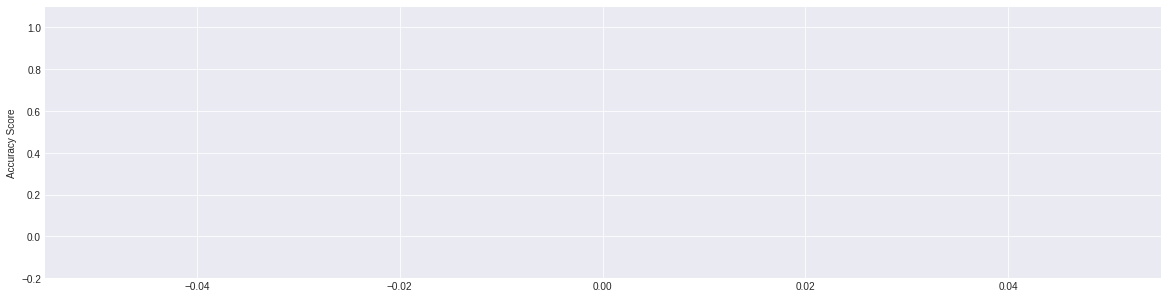

In [66]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(modell,test_score, color='teal')
plt.plot(modell,train_score, color='blue')
plt.ylim(-0.2, 1.1)
plt.ylabel("Accuracy Score")
plt.show()

In [67]:
for i, model in enumerate(pipelines):
    print(f'{pipe_dict[i]} has test accuracy: {round(model.score(x_test, y_test),2)}')
    print(f'{pipe_dict[i]} has train accuracy: {round(model.score(x_train, y_train),2)}')
    print('')

Linear Regression has test accuracy: 0.2
Linear Regression has train accuracy: 0.23

Support Vector Regression has test accuracy: -0.01
Support Vector Regression has train accuracy: -0.01

Decision Tree Regression has test accuracy: 0.58
Decision Tree Regression has train accuracy: 0.99

K-Neighbors Regression has test accuracy: 0.16
K-Neighbors Regression has train accuracy: 0.45

Random Forest Regression has test accuracy: 0.78
Random Forest Regression has train accuracy: 0.96

Ada Boost has test accuracy: 0.33
Ada Boost has train accuracy: 0.33

Gradient Boost has test accuracy: 0.61
Gradient Boost has train accuracy: 0.61

Xgboost has test accuracy: 0.61
Xgboost has train accuracy: 0.61

